# Analyse des écoles et collèges Français suite aux diverses polémiques sur le secteur privée et publique.

source fichier data gouv ministère de l'éducation nationale


In [1]:
# import des bibliotheques
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from os import remove

import fonctions.perso_stats as perso_stats


In [2]:
# import des fichiers
ecole = pd.read_csv('donnee_temp/ecole.csv',dtype={'code_du_departement' : str,
                                                    'uai': str,
                                                    'nom_de_l_etablissment' : str,
                                                    'code_insee_de_la_commune': str,
                                                    'nom_de_la_commune': str})
                                                    
college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [3]:
# information generale du fichier ecole
ecole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194898 entries, 0 to 194897
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   rentree_scolaire                        194898 non-null  int64  
 1   code_du_departement                     30059 non-null   object 
 2   uai                                     30059 non-null   object 
 3   nom_de_l_etablissment                   30059 non-null   object 
 4   code_insee_de_la_commune                30059 non-null   object 
 5   nom_de_la_commune                       30059 non-null   object 
 6   effectifs                               30059 non-null   float64
 7   ips                                     30059 non-null   float64
 8   region_academique                       194898 non-null  object 
 9   academie                                194898 non-null  object 
 10  departement                             1948

In [4]:
#information general du fichier college
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32982 entries, 0 to 32981
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                32982 non-null  int64  
 1   rentree_scolaire                          32982 non-null  int64  
 2   region_academique                         32982 non-null  object 
 3   academie                                  32982 non-null  object 
 4   departement                               32982 non-null  object 
 5   commune                                   32982 non-null  object 
 6   numero_college                            32982 non-null  object 
 7   denomination_principale                   32982 non-null  object 
 8   patronyme                                 32927 non-null  object 
 9   secteur                                   32982 non-null  object 
 10  rep                               

In [5]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# École maternel et élémentaire

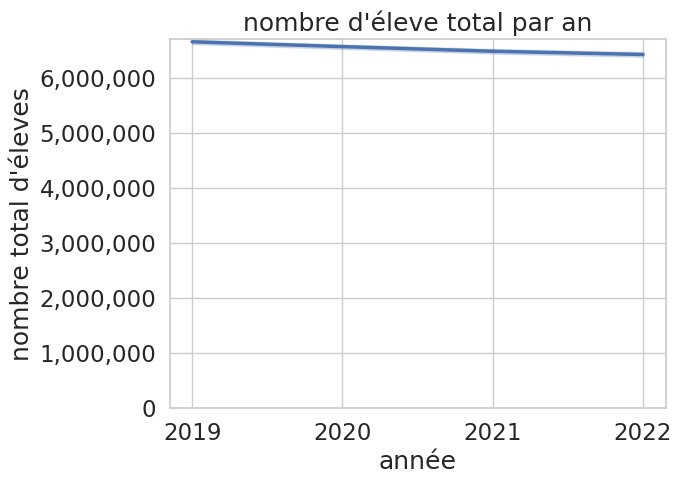

In [6]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='rentree_scolaire',y='nombre_total_eleves',ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
plt.show()

Le nombre d'éléve est en legere baisse.

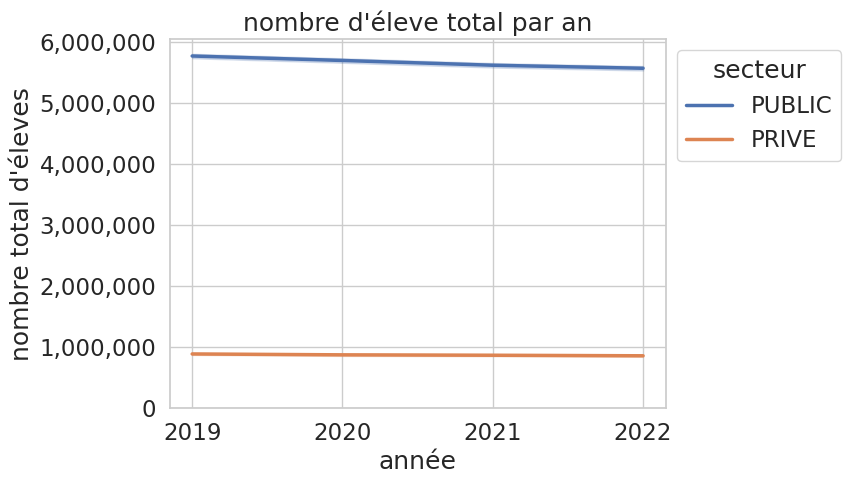

In [7]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='rentree_scolaire',y='nombre_total_eleves',hue="secteur",ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre d'éleve total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'éleves")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

La baisse est plus forte en public qu'en privée

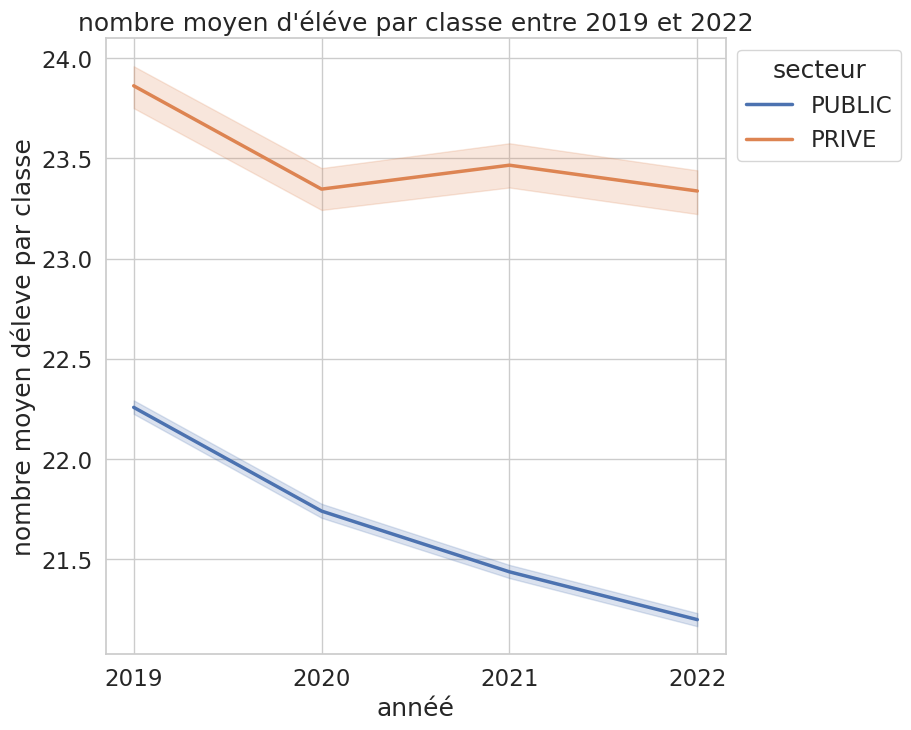

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.lineplot(data=ecole,x='rentree_scolaire',y='Nombre_eleves_par_classe_moyenne',hue="secteur",ax=ax,estimator='mean')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre moyen d'éléve par classe entre 2019 et 2022")
ax.set_xlabel("annéé")
ax.set_ylabel("nombre moyen déleve par classe")
ax.set_ylim()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le nombre d'éléve par classe baisse globalement.<br>
L'école publique à moins d'éléve par classe que les écoles privée.<br>

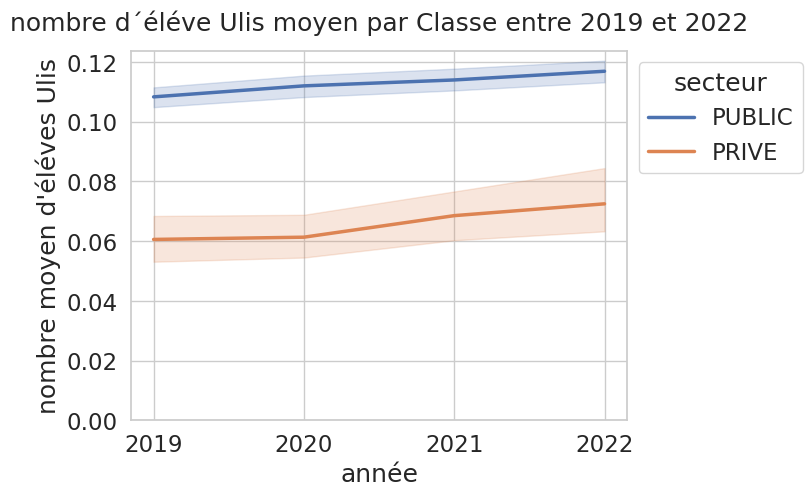

In [9]:
fig,ax = plt.subplots()
sns.lineplot(data=ecole,x='rentree_scolaire',y='ulis_moyen_classe',hue='secteur',ax=ax,estimator='mean')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("nombre d´éléve Ulis moyen par Classe entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("nombre moyen d'éléves Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

On a environ 2 fois moins d´élève ULIS dans les classes des écoles privées.

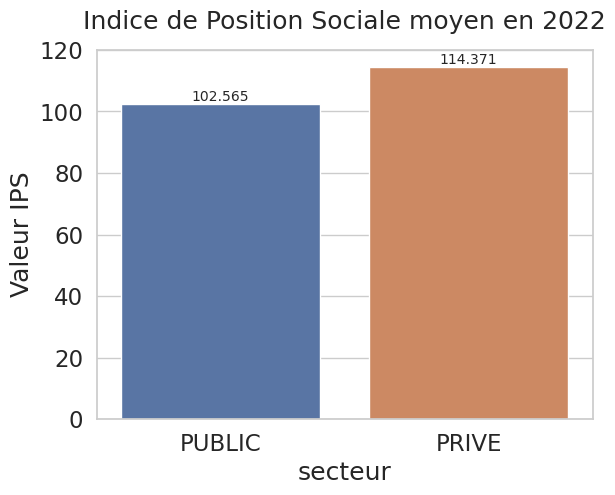

In [10]:
fig,ax = plt.subplots()
sns.barplot(data=ecole,x='secteur', y="ips",ax=ax,estimator="mean",errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

Les conditions sociales des élèves du privée sont plus favorable à la réussite que dans le public<br>


# Collège

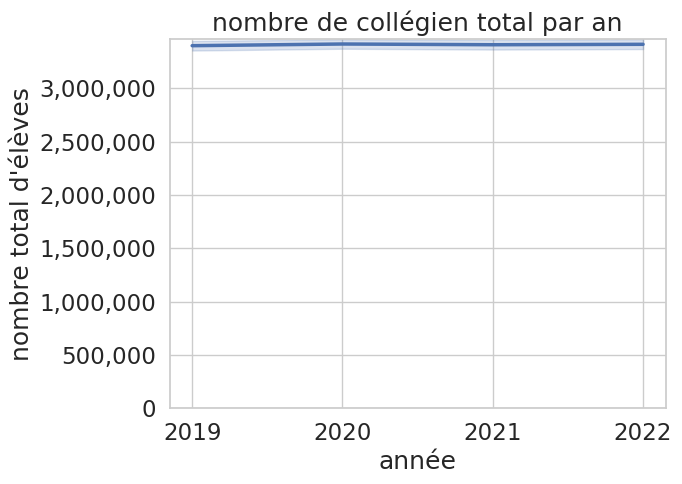

In [11]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='rentree_scolaire',y='nombre_eleves_total',ax=ax,estimator='sum')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre de collégien total par an")
ax.set_xlabel("année")
ax.set_ylabel("nombre total d'élèves")
plt.show()

Le nombre de collégien augmente légérement.

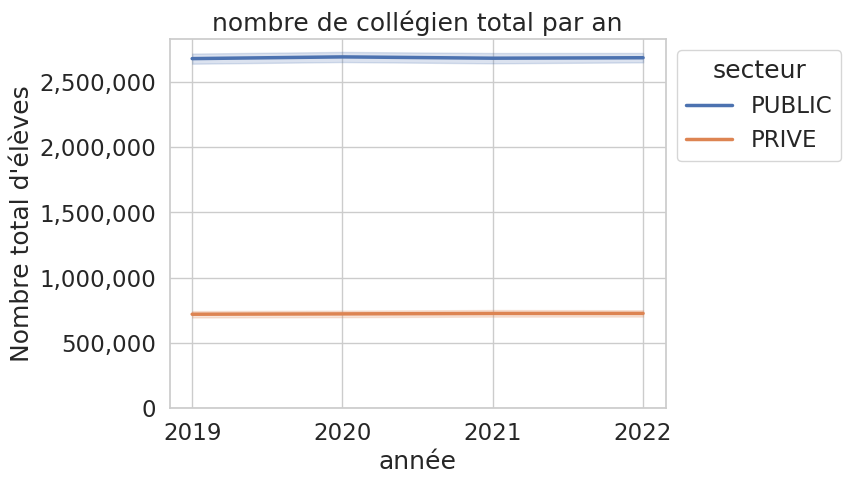

In [12]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='rentree_scolaire',y='nombre_eleves_total',ax=ax,estimator='sum',hue='secteur')
ax.set_ylim(0)
ax.ticklabel_format(axis='y',style='plain')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ",")))
ax.set_title("nombre de collégien total par an")
ax.set_xlabel("année")
ax.set_ylabel("Nombre total d'élèves")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Le nombre d'élève dans le privée reste très stable.<br>
Le nombre d'élève dans le public subit un peu plus de fluctuation, mais très légére.<br>

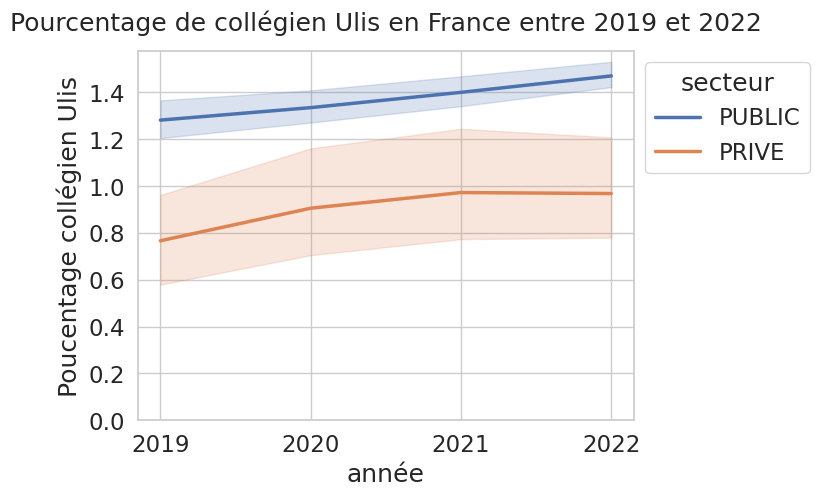

In [13]:
fig,ax = plt.subplots()
sns.lineplot(data=college,x='rentree_scolaire',y='pourcentage_ulis_total',hue='secteur',ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Pourcentage de collégien Ulis en France entre 2019 et 2022",pad=15)
ax.set_xlabel("année")
ax.set_ylabel("Poucentage collégien Ulis")
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [14]:
# test statistique sur privé/public resultats et Ulis resultats
pop_privé = college[college['secteur']=='PRIVE'].copy()
pop_public = college[college['secteur']=='PUBLIC'].copy()

result = perso_stats.ANOVA(df1=pop_privé['nombre_eleves_ulis'],df2=pop_public['nombre_eleves_ulis'])



Interprétation du test:
H0 : Les moyennes des groupes sont égales
H1 : Les moyennes des groupes ne sont pas égales
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


Le pourcentage de d'élèves ULIS dans les classe est supérieur dans le public.<br>
Il y a une augmentation constante des élèves ULIS dans le public. <br>
L'augmentation en pourcentage était très forte en 2019 pour finalement se stabiliser en 2021 sur le privée.<br>
Un test statistique montre qu'il ne s'agit pas de la même population entre le public et le privée concernant les éléves ULIS.<br>

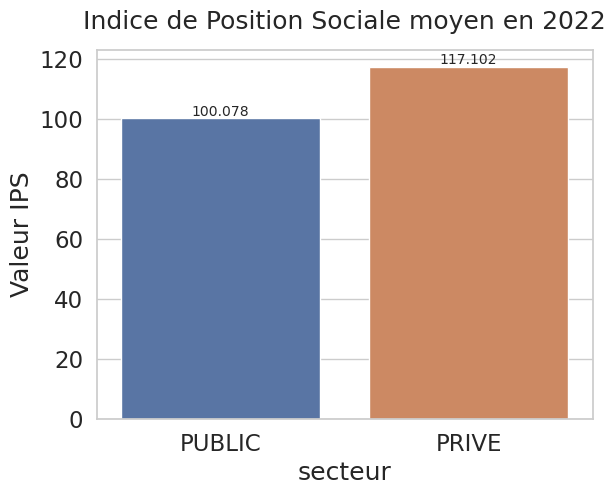

In [15]:
fig,ax = plt.subplots()
sns.barplot(data=college, y="ips",ax=ax,estimator="mean",x='secteur',errorbar=None)
ax.set_title("Indice de Position Sociale moyen en 2022",pad=15)
ax.set_ylabel("Valeur IPS")
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylim(0)
plt.show()

L'ecart moyen de l'Indice de Position Sociale dans les colléges est plus important que dans les école primaire et maternelle

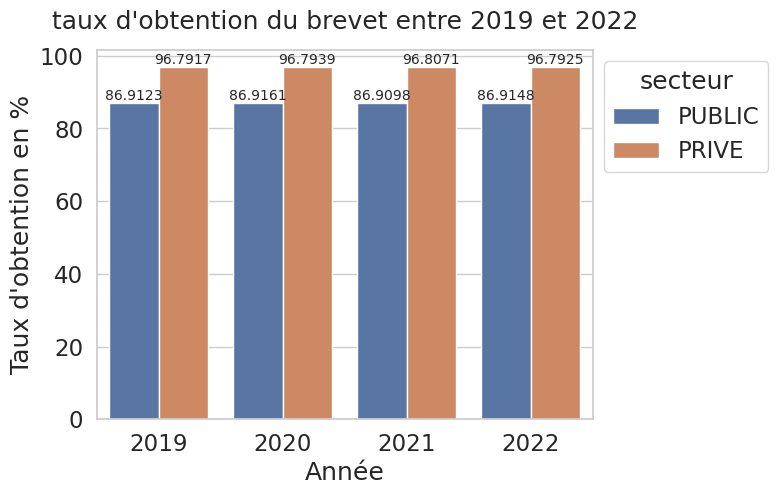

In [16]:
fig,ax = plt.subplots()
sns.barplot(data=college, x="rentree_scolaire", y="taux_de_reussite_g",ax=ax,hue="secteur",estimator="mean",errorbar=None)
ax.set_title("taux d'obtention du brevet entre 2019 et 2022",pad=15)
ax.set_ylabel("Taux d'obtention en %")
ax.set_xlabel("Année")
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.set_ylim(0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Un écart de 10 points entre les resultats des college privée et public.

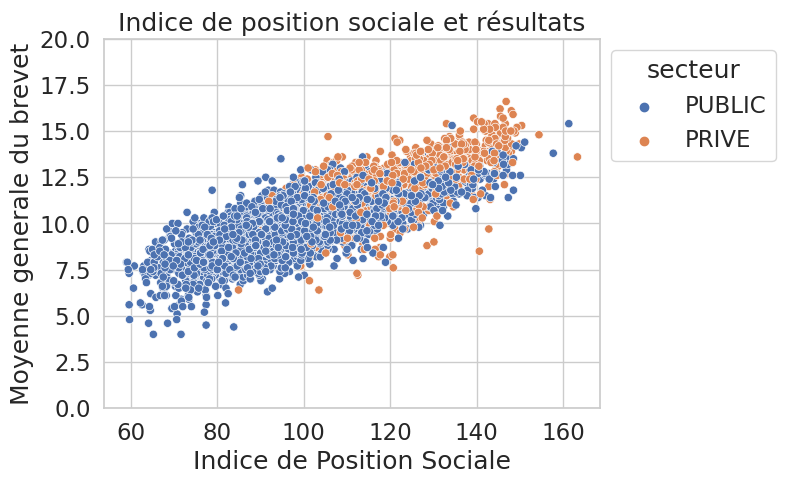

In [17]:
fig,ax = plt.subplots()
sns.scatterplot(data=college,y='note_a_l_ecrit_g',x='ips',hue='secteur',ax=ax)
ax.set_title('Indice de position sociale et résultats')
ax.set_ylabel('Moyenne generale du brevet')
ax.set_xlabel('Indice de Position Sociale')
ax.set_ylim(0,20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [18]:
# verifier corrélation entre note et ips
corrélation_note_ips = round(college['ips'].corr(college['note_a_l_ecrit_g'])*100,2)
print("On a une corrélation de ",corrélation_note_ips,"%.")

On a une corrélation de  80.85 %.


On remarque bien la corrélation entre l'IPS et les notes aux brevets.<br>
L'IPS explique à 80% les notes à l écrit au brevets.<br>

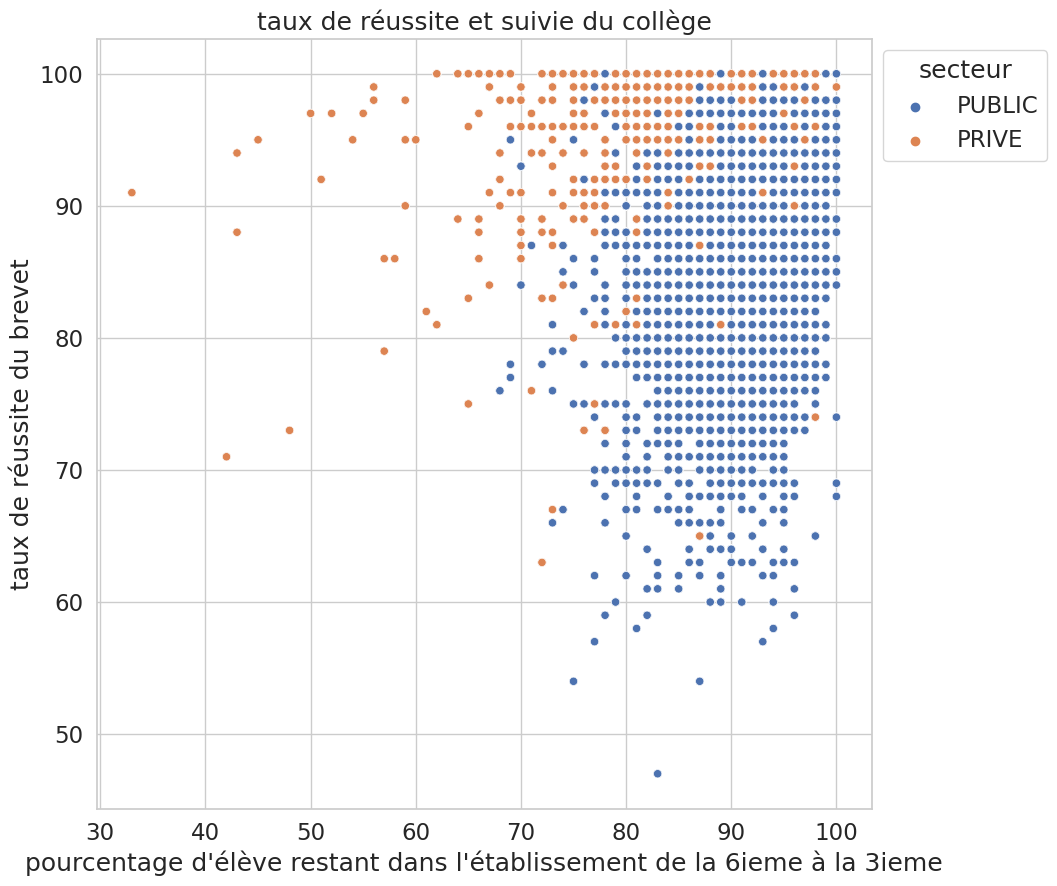

In [19]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.scatterplot(data=college,x='taux_d_acces_6eme_3eme' ,y='taux_de_reussite_g',hue='secteur',ax=ax)
ax.set_title('taux de réussite et suivie du collège')
ax.set_ylabel('taux de réussite du brevet')
ax.set_xlabel("pourcentage d'élève restant dans l'établissement de la 6ieme à la 3ieme")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

Les taux de réussite aux brevet sont les plus ahuts dans le privée mais on peut aussi remarqué un taux de maintient des élèves dans l'établissement plus haut dans le public.<br>

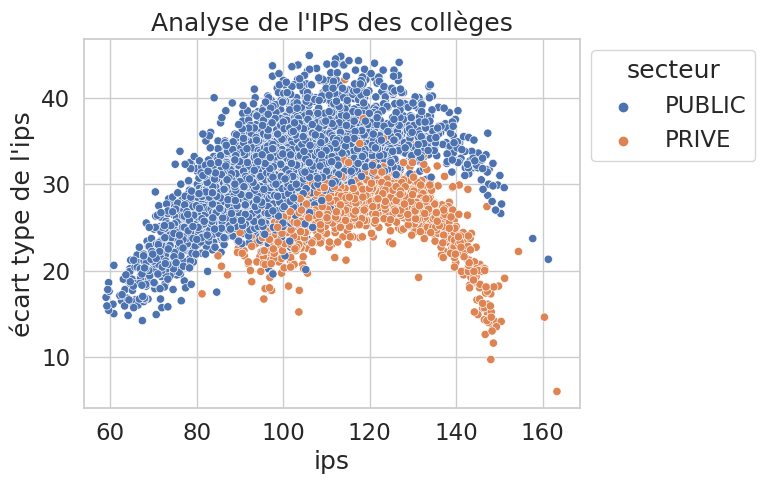

In [20]:
fig,ax = plt.subplots()
sns.scatterplot(data=college,x='ips',y='ecart_type_de_l_ips',hue='secteur',ax=ax)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("écart type de l'ips")
ax.set_title("Analyse de l'IPS des collèges")
plt.show()

In [21]:
result = perso_stats.ANOVA(df1=pop_public['ips'].dropna(),df2=pop_privé['ips'].dropna())



Interprétation du test:
H0 : Les moyennes des groupes sont égales
H1 : Les moyennes des groupes ne sont pas égales
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


On s'apervoit que aux niveaux de l ÍPS, certains colleges privées ont on une population plutôt privilégié.<br>
Certain on donc un IPS très élèvé avec un faible écart type qui peut être aperçu comme un entre-sois.<br>
Á l'autre extremité certain college public ont un public avec un faible IPS et une faible mixité sociale.<br>
Celà peut ressembler de loin à une sorte de ghettorisation d'un certaine population.<br>

# Lycée